Reliza una aplicación de redes neuronales convolucionales para clasificar, segmentar o detectar objetos en imágenes.

Para este caso se realizara la clasificacion de imagenes

Base de datos utilizada para las imagenes de animales:
https://www.kaggle.com/datasets/iamsouravbanerjee/animal-image-dataset-90-different-animals?resource=download&select=animals

In [1]:
# Librerias a utilizar
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
base_dir = 'C:/Users/USER/Desktop/animals'  # ruta donde estan mis imagenes
categories = ['dog', 'panda', 'parrot'] # categorias, animales que usare
img_size = (128, 128) # Tamaño de la imagen

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Preparar la imagen
datagen = ImageDataGenerator(
    rescale=1./255,  # Normaliza las imágenes para que tengan la misma escala
    validation_split=0.2  # Divide el 20% de los datos para validación y 80% entrenamiento
)

# Cargar el conjunto de entrenamiento
train_generator = datagen.flow_from_directory(
    base_dir,  # Directorio donde están las imágenes
    target_size=img_size,  # Redimensionar las imágenes
    batch_size=24,  # Tamaño del batch
    class_mode='categorical',  # Clasificación multiclase
    subset='training',  # Subconjunto de entrenamiento
    shuffle=False,  # No barajear las imagenes
    classes=['dog', 'panda', 'parrot']  # clases que usare
)

# Cargar el conjunto de validación
validation_generator = datagen.flow_from_directory(
    base_dir,  # Directorio donde están las imágenes
    target_size=img_size,  # Redimensionar las imágenes
    batch_size=24,  # Tamaño del batch
    class_mode='categorical',  # Clasificación multiclase
    subset='validation',  # Subconjunto de validación
    shuffle=False,  # No barajear las imagenes
    classes=['dog', 'panda', 'parrot']  # clases que usare
)

Found 144 images belonging to 3 classes.
Found 36 images belonging to 3 classes.


In [4]:
print(train_generator.class_indices)  # Muestra las clases y sus índices

{'dog': 0, 'panda': 1, 'parrot': 2}


In [5]:
# --- Creacion de la Red Convolucional ---
# Crear el modelo secuencial
model = Sequential()

# Defini tambien la entrada aqui por que me arrojaba un warning
model.add(Input(shape=(128, 128, 3))) 

# Capa convolucional con 32 filtros de tamaño 3x3 para extraer caracteristicas
model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))

# Capa de MaxPooling para reducir el tamaño computacional y extraer mas caracteristicas
model.add(MaxPooling2D(pool_size=(2, 2)))

# Aplanar la salida de la capa convolucional -- Ayuda a convertir la salida en unidimensional
model.add(Flatten())

# Capa oculta densa con 128 neuronas con activacion relu para la no linealidad
model.add(Dense(128, activation='relu'))

# Capa de salida (3 clases: dog, panda, parrot) y usando activacion softmax para que nos de una probabilidad = 1
model.add(Dense(3, activation='softmax'))

# Compilar el modelo
model.compile(loss='categorical_crossentropy', #Usamos entropia cruzada
              metrics=['accuracy'], #Precision
              optimizer='adam') #Se utiliza adam para actualizar los pesos

In [6]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True) #Se agrega la paciencia de 3, por si no existen cambios.

history = model.fit(
    train_generator, #Conjunto de entrenamiento
    epochs=50, #numero de epocas maximo
    validation_data=validation_generator, #Conjunto de validacion
    callbacks=[early_stop] # Agregue el early stop, si encuentra que no obtiene beneficios en 3 epocas detiene el ciclo de entrenamiento
)


C:\Users\USER\anaconda33\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 359ms/step - accuracy: 0.0000e+00 - loss: 35.6418 - val_accuracy: 0.3333 - val_loss: 8.6288
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 282ms/step - accuracy: 0.4183 - loss: 7.7658 - val_accuracy: 0.3333 - val_loss: 2.5028
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 296ms/step - accuracy: 0.4294 - loss: 3.6586 - val_accuracy: 0.5278 - val_loss: 3.5292
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 307ms/step - accuracy: 0.7382 - loss: 1.3743 - val_accuracy: 0.6111 - val_loss: 0.7874
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 269ms/step - accuracy: 0.6958 - loss: 0.7257 - val_accuracy: 0.5000 - val_loss: 1.1445
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 267ms/step - accuracy: 0.7245 - loss: 0.7030 - val_accuracy: 0.5556 - val_loss: 0.8682
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 287ms/step - accuracy: 0.7966 - loss: 0.4497 - val_accuracy: 0.5833 - val_loss: 0.9648
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 290ms/step - accuracy: 0.7179 - loss: 0.5974 - val_accuracy: 0.6944 - val_

Se utilizaran imagenes (diferentes a las que se usaron en el conjunto de validacion y entrenamiento)
Se utiliza el modelo creado para comprobar su Precision

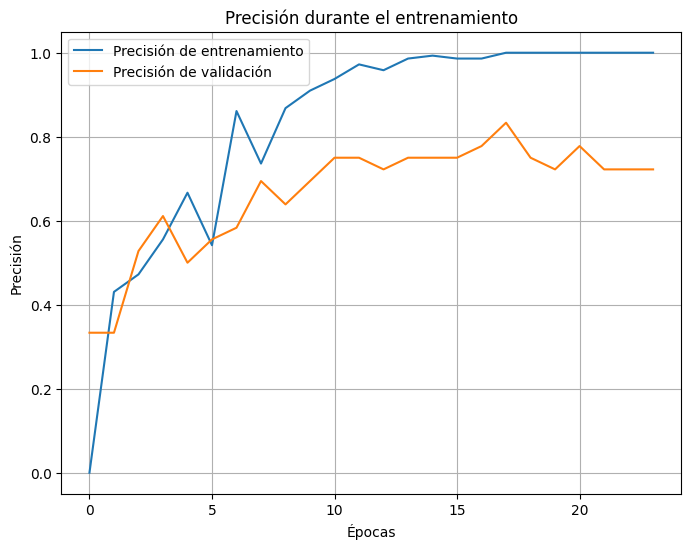

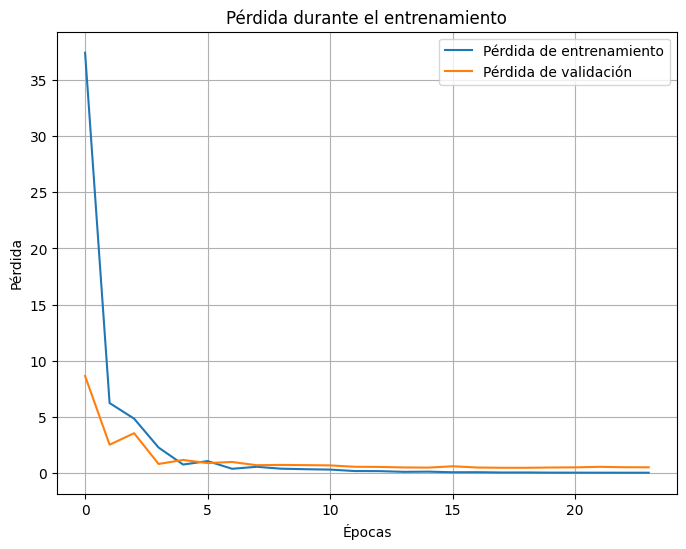

In [7]:
# Graficar la precisión y la pérdida durante el entrenamiento
# Precisión
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)
plt.savefig('actividad_5_precision.png')
plt.show()


# Pérdida
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)
plt.savefig('actividad_5_perdida.png')
plt.show()


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


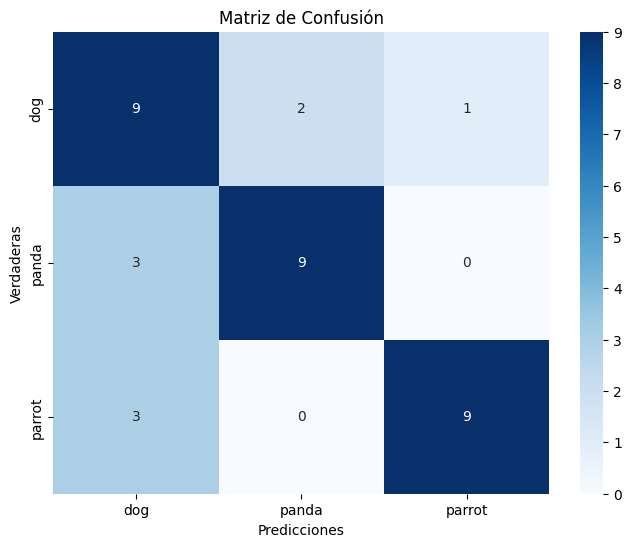

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predecir las clases en el conjunto de validación
y_true = validation_generator.classes
y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Crear matriz de confusión
cm = confusion_matrix(y_true, y_pred_classes)

# Mostrar la matriz de confusión con un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Verdaderas')
plt.savefig('actividad_5_matriz_confusion.png')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predicción: dog


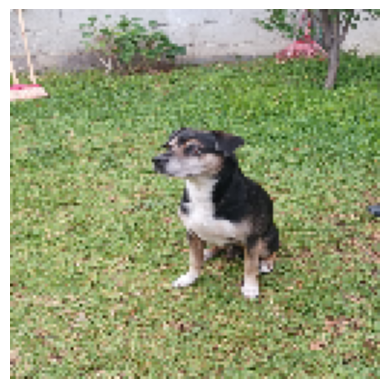

In [9]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Cargar y preprocesar una nueva imagen
img_path = 'C:/Users/USER/Desktop/negrito.jpg'
img = image.load_img(img_path, target_size=(128, 128))  # Redimensiona la imagen
img_array = image.img_to_array(img) / 255.0  #  Normalizar la imagen
img_array = np.expand_dims(img_array, axis=0)  # tamaño del batch

# Hacer la predicción
prediction = model.predict(img_array)
predicted_class = categories[np.argmax(prediction)]  # Obtiene la clase que se predice
print(f"Predicción: {predicted_class}")

# Mostrar la imagen
plt.imshow(img)  # Muestra la imagen
plt.axis('off') 
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicción: panda


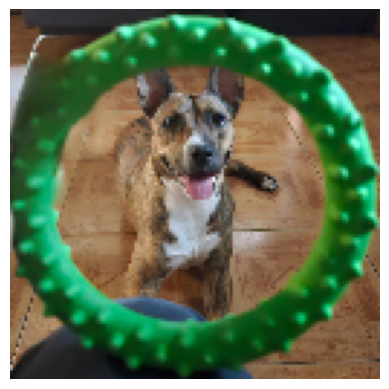

In [10]:
img_path = 'C:/Users/USER/Desktop/rexi1.jpeg'
img = image.load_img(img_path, target_size=(128, 128))  # Redimensiona la imagen
img_array = image.img_to_array(img) / 255.0  #  Normalizar la imagen
img_array = np.expand_dims(img_array, axis=0)  # tamaño del batch

# Hacer la predicción
prediction = model.predict(img_array)
predicted_class = categories[np.argmax(prediction)]  # Obtiene la clase que se predice
print(f"Predicción: {predicted_class}")

# Mostrar la imagen
plt.imshow(img)  # Muestra la imagen
plt.axis('off') 
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicción: dog


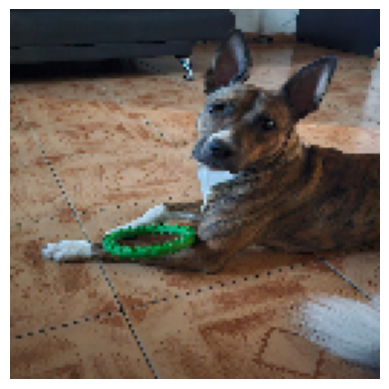

In [11]:
img_path = 'C:/Users/USER/Desktop/rexi2.jpeg'
img = image.load_img(img_path, target_size=(128, 128))  # Redimensiona la imagen
img_array = image.img_to_array(img) / 255.0  #  Normalizar la imagen
img_array = np.expand_dims(img_array, axis=0)  # tamaño del batch

# Hacer la predicción
prediction = model.predict(img_array)
predicted_class = categories[np.argmax(prediction)]  # Obtiene la clase que se predice
print(f"Predicción: {predicted_class}")

# Mostrar la imagen
plt.imshow(img)  # Muestra la imagen
plt.axis('off') 
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicción: panda


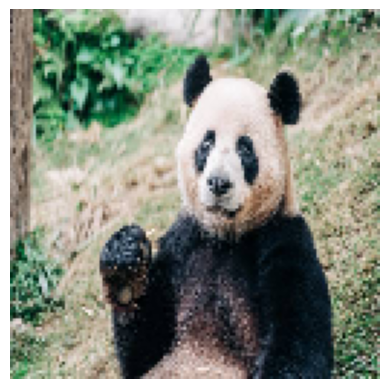

In [12]:
# Cargar y preprocesar una nueva imagen
img_path = 'C:/Users/USER/Desktop/pandota.jpg'
img = image.load_img(img_path, target_size=(128, 128))  # Redimensiona la imagen
img_array = image.img_to_array(img) / 255.0  #  Normalizar la imagen
img_array = np.expand_dims(img_array, axis=0)  # tamaño del batch

# Hacer la predicción
prediction = model.predict(img_array)
predicted_class = categories[np.argmax(prediction)]  # Obtiene la clase que se predice
print(f"Predicción: {predicted_class}")

# Mostrar la imagen
plt.imshow(img)  # Muestra la imagen
plt.axis('off') 
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicción: parrot


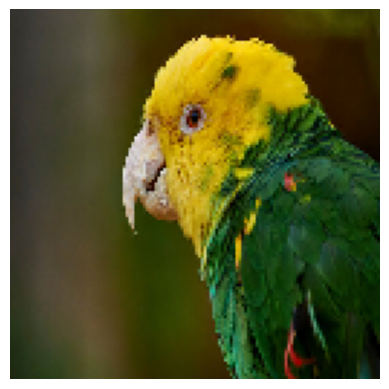

In [13]:
# Cargar y preprocesar una nueva imagen
img_path = 'C:/Users/USER/Desktop/cotorro.jpg'
img = image.load_img(img_path, target_size=(128, 128))  # Redimensiona la imagen
img_array = image.img_to_array(img) / 255.0  #  Normalizar la imagen
img_array = np.expand_dims(img_array, axis=0)  # tamaño del batch

# Hacer la predicción
prediction = model.predict(img_array)
predicted_class = categories[np.argmax(prediction)]  # Obtiene la clase que se predice
print(f"Predicción: {predicted_class}")

# Mostrar la imagen
plt.imshow(img)  # Muestra la imagen
plt.axis('off') 
plt.show()